In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1:Load the dataset
data = pd.read_csv('BostonHousing.csv')  
print(data.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [50]:
# Check for missing values and handle them
df_cleaned = data.dropna()


In [51]:
#Simple Linear Regression

# Use 'rm' (average number of rooms) as the feature to predict 'medv' (median value of homes)
X_simple = df_cleaned[['rm']]
y_simple = df_cleaned['medv']

# Split the data into training and testing sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Initialize and train the simple linear regression model
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train_simple)

LinearRegression()

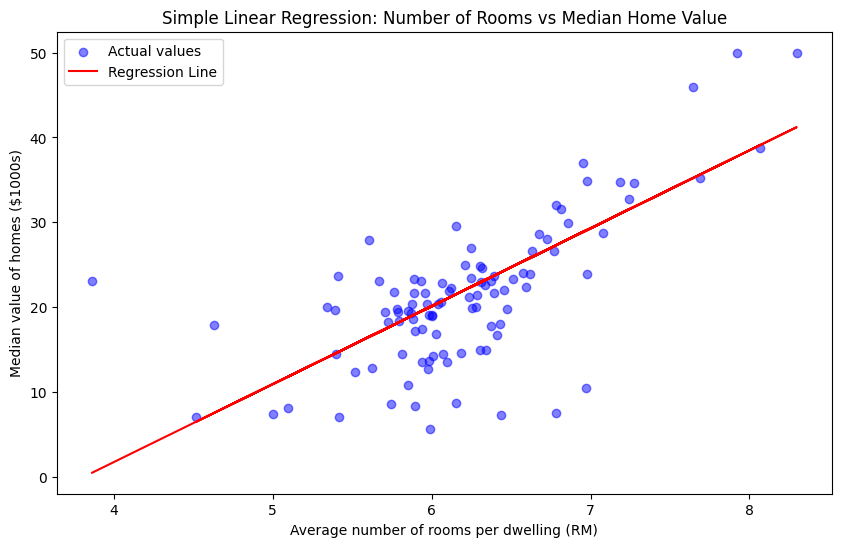

In [52]:
# Predictions using the simple linear model
y_pred_simple = simple_lr.predict(X_test_simple)

# Plotting the regression results
plt.figure(figsize=(10,6))
plt.scatter(X_test_simple, y_test_simple, color="blue", label="Actual values", alpha=0.5)
plt.plot(X_test_simple, y_pred_simple, color="red", label="Regression Line")
plt.title("Simple Linear Regression: Number of Rooms vs Median Home Value")
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Median value of homes ($1000s)")
plt.legend()
plt.show()

In [53]:
# Multiple Linear Regression

# Use multiple features to predict 'medv'
X_multiple = df_cleaned[['crim', 'rm', 'age', 'tax', 'lstat', 'ptratio']]
y_multiple = df_cleaned['medv']

# Split the data into training and testing sets
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

# Initialize and train the multiple linear regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_multiple, y_train_multiple)

LinearRegression()

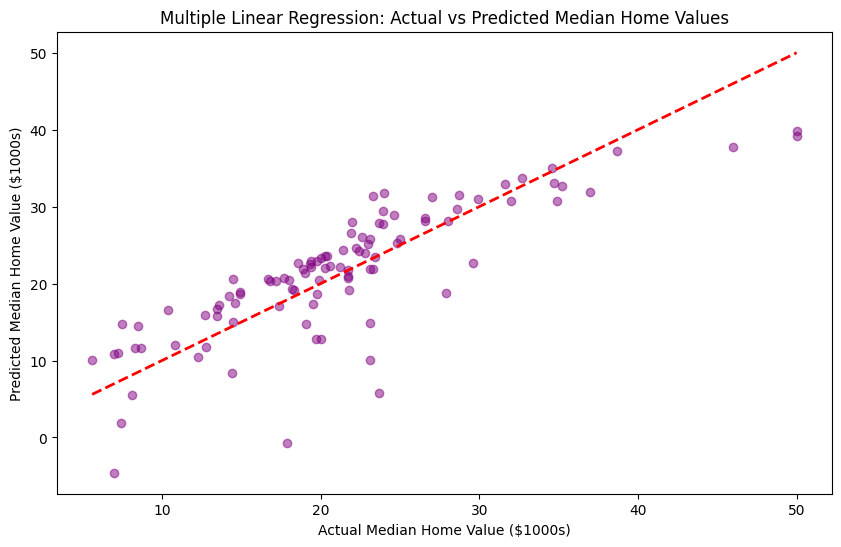

In [54]:
# Predictions using the multiple linear regression model
y_pred_multiple = multiple_lr.predict(X_test_multiple)

# Plotting actual vs predicted values for Multiple Linear Regression
plt.figure(figsize=(10,6))
plt.scatter(y_test_multiple, y_pred_multiple, color="purple", alpha=0.5)
plt.plot([y_test_multiple.min(), y_test_multiple.max()], [y_test_multiple.min(), y_test_multiple.max()], 'r--', lw=2)
plt.title("Multiple Linear Regression: Actual vs Predicted Median Home Values")
plt.xlabel("Actual Median Home Value ($1000s)")
plt.ylabel("Predicted Median Home Value ($1000s)")
plt.show()

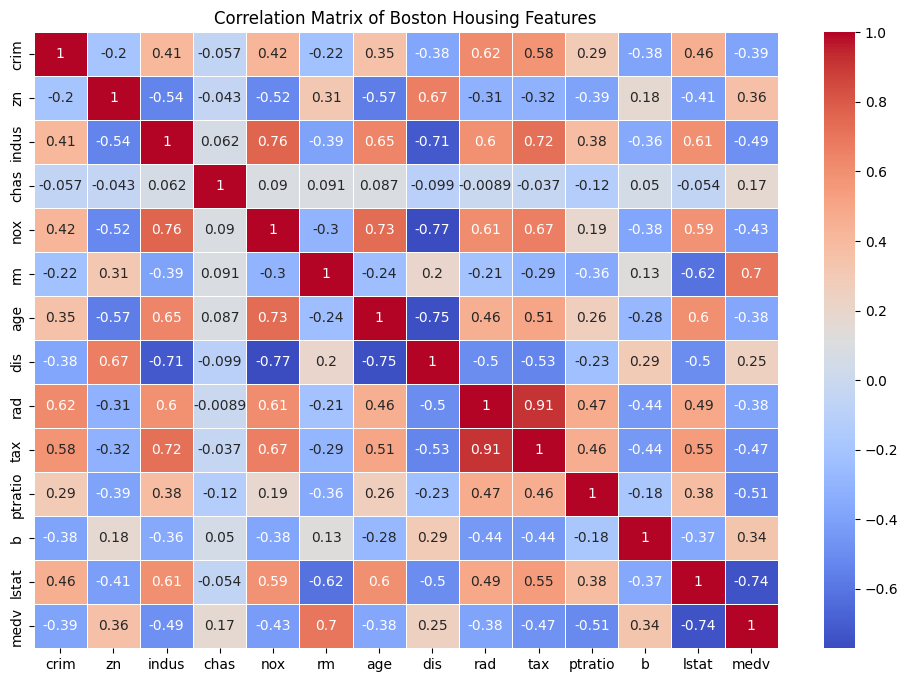

In [55]:
# Generate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Boston Housing Features')
plt.show()

C:\Users\PRATIKSHA NAIK\AppData\Local\Temp\ipykernel_21052\290144316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='chas', y='medv', data=data, palette='Blues')


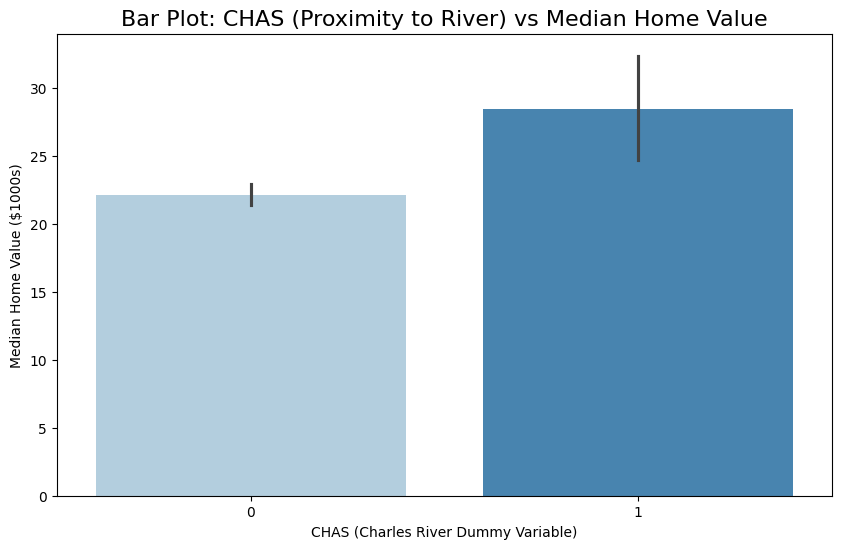

In [61]:
# Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(x='chas', y='medv', data=data, palette='Blues')
plt.title('Bar Plot: CHAS (Proximity to River) vs Median Home Value', fontsize=16)
plt.xlabel('CHAS (Charles River Dummy Variable)')
plt.ylabel('Median Home Value ($1000s)')
plt.show()


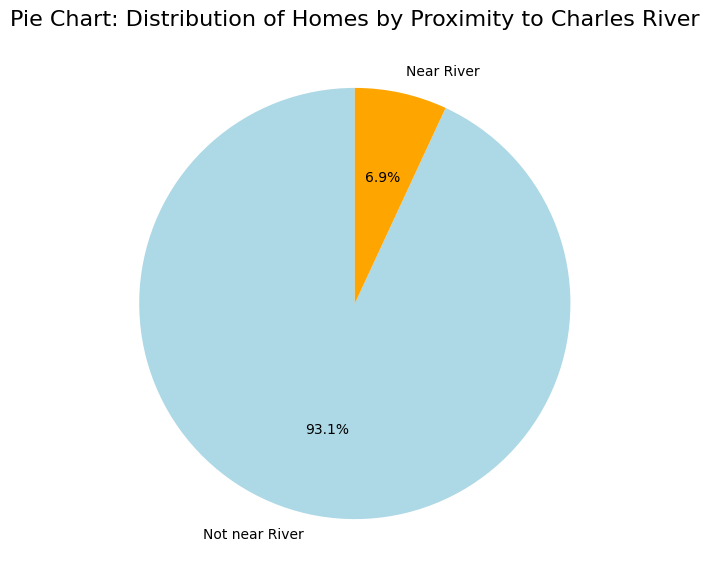

In [58]:
# Pie Chart: Distribution of Home's Proximity to the River (CHAS variable)
labels = data['chas'].value_counts().index
sizes = data['chas'].value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=['Not near River', 'Near River'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Pie Chart: Distribution of Homes by Proximity to Charles River', fontsize=16)
plt.show()

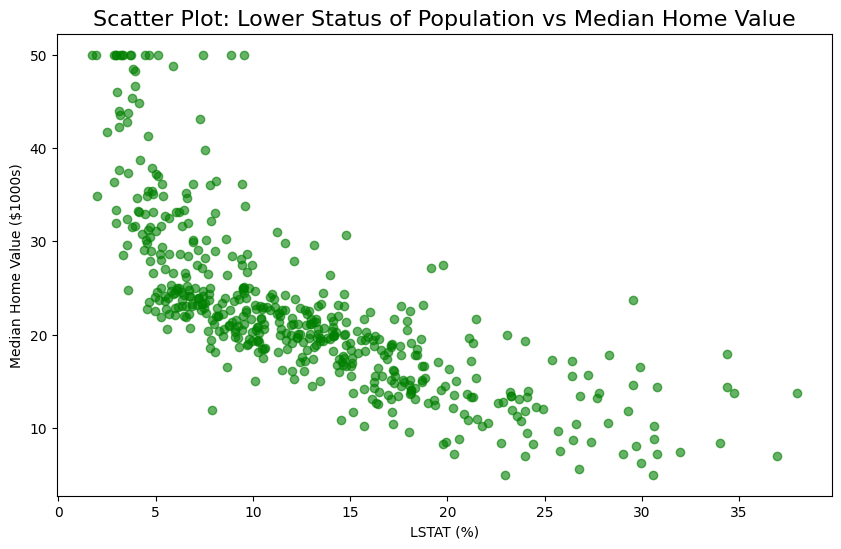

In [60]:
# Scatter Plot: LSTAT vs MEDV (Lower Status of Population vs Median Home Value)
plt.figure(figsize=(10,6))
plt.scatter(data['lstat'], data['medv'], alpha=0.6, color='green')
plt.title('Scatter Plot: Lower Status of Population vs Median Home Value', fontsize=16)
plt.xlabel('LSTAT (%)')
plt.ylabel('Median Home Value ($1000s)')
plt.show()